# PA2 of CSE 251B, WI 21

## (a) Load training and testing data then create a validation split from the training data.

In [3]:
from neuralnet import *
import numpy as np

# Load the configuration.
config = load_config("./")

# Create the model
model  = Neuralnetwork(config)

 # Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.1)

## Part (b) Estimation of bias weight and weight

In [6]:
from neuralnet import *
from random import shuffle
import numpy as np

# Functions
def check_d_b(model, layer, eps, output_idx):
    layer.b[0][output_idx] += eps # w+eps
    loss_1 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    layer.b[0][output_idx] -= 2*eps # w-eps
    loss_2 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    d_b_get = (loss_1 - loss_2) / (2 * eps) # Numerical estimation
    layer.b[0][output_idx] += eps # back to original para
    return d_b_get

def check_d_w(model, layer, eps, input_idx, output_idx):
    layer.w[input_idx][output_idx] += eps # w+eps
    loss_1 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    layer.w[input_idx][output_idx] -= 2*eps # w-eps
    loss_2 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    d_w_get = (loss_1 - loss_2) / (2 * eps) # Numerical estimation
    layer.w[input_idx][output_idx] += eps # back to original para
    return d_w_get

# para
eps = 0.01

# Data loading and spliting
x_b, y_b = load_data(path="./", mode="train")

class_num = list(range(10))
xtrain, ytrain = [], []
for idx in range(y_b.shape[0]):
    if len(class_num) == 0:
        break
    if np.argmax(y_b[idx]) in class_num:
        xtrain.append(x_b[idx])
        ytrain.append(y_b[idx])
        class_num.remove(np.argmax(y_b[idx]))
        
# Load model para
config_b= yaml.load(open('./partb.yaml', 'r'), Loader=yaml.SafeLoader)

model = Neuralnetwork(config_b)
model.forward(np.array(xtrain), np.array(ytrain))
model.backward()

# Calaulation
d_b, d_b_estimate, d_w, d_w_estimate = [], [], [], []
for layer in model.layers:
    if isinstance(layer, Layer):
        d_b_estimate.append(check_d_b(model=model, layer=layer, eps=eps, output_idx=1))
        d_w_estimate.append([check_d_w(model=model, layer=layer, eps=eps, input_idx=0, output_idx=1), check_d_w(model=model, layer=layer, eps = eps, input_idx=0, output_idx=2)])
        d_b.append(layer.d_b[1] * 10) # multiply by the scaling factor
        d_w.append([np.multiply(layer.d_w[0][1], 10) ,np.multiply(layer.d_w[0][2], 10)]) # multiply by the scaling factor
print('Real b: {}'.format(d_b))
print('Estimate b: {}'.format(d_b_estimate))
print('Real w: {}'.format(d_w))
print('Estimate w: {}'.format( d_w_estimate))
        






Real b: [0.0947910547957617, 0.13280277310665525, 0.2829988269880445]
Estimate b: [0.0947903741035816, 0.13279972873103674, 0.2829986440210597]
Real w: [[-0.07680517789998755, 0.015319507447675743], [-0.13117408499853775, 0.005687043423169844], [0.26639110994547144, -0.09570147055050932]]
Estimate w: [[-0.07680481582612586, 0.01532012360456747], [-0.13117096720440813, 0.005686759664325081], [0.26639090431119783, -0.0957014082263008]]


## (c) Cross Validation

In [ ]:
# load model para
config_c = yaml.load(open('./partc.yaml', 'r'), Loader=yaml.SafeLoader)

# Train the model with cross validation
max_test_accu = 0

model_c = Neuralnetwork(config_c)
recording = train(model_c, x_train, y_train, x_valid, y_valid, config_c)

# Recall parameters with minimum validation loss
model_c.load_para()
test_accuracy = test(model_c, x_test, y_test)
max_test_accu = max(max_test_accu, test_accuracy)
        
print('max test accuracy: {:.4f}'.format(max_test_accu))

## (c) training and validation accuracy / loss vs number of training epochs

In [ ]:
# Plots
plt.figure(1)
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training and validation loss vs number of training epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs number of training epochs')
plt.legend()
plt.show()

## Part (f) Experiment with Network Topology

### (i) Different number of hidden layer

[784, 50, 100, 10]


C:\Users\netzz\Documents\GitHub\CSE251B-PA\PA2\neuralnet.py:345: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.multiply(targets, np.log(logits))) / scale_size
C:\Users\netzz\Documents\GitHub\CSE251B-PA\PA2\neuralnet.py:345: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(np.multiply(targets, np.log(logits))) / scale_size


Epoch 1, Time 1.288595199584961 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.6915
Epoch 11, Time 12.820348501205444 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.6993
Epoch 21, Time 25.016292810440063 seconds
Train_loss = 10.0616, Valid_loss = 10.0135, Valid_accuracy = 0.7172
Epoch 31, Time 37.1735143661499 seconds
Train_loss = 6.7100, Valid_loss = 6.6576, Valid_accuracy = 0.7560
Epoch 41, Time 49.34097123146057 seconds
Train_loss = 4.5571, Valid_loss = 4.5168, Valid_accuracy = 0.7825
Epoch 51, Time 62.372114419937134 seconds
Train_loss = 3.1470, Valid_loss = 3.1240, Valid_accuracy = 0.7908
Epoch 61, Time 74.68518161773682 seconds
Train_loss = 2.2158, Valid_loss = 2.2005, Valid_accuracy = 0.8005
Epoch 71, Time 87.02118563652039 seconds
Train_loss = 1.5976, Valid_loss = 1.5885, Valid_accuracy = 0.8203
Epoch 81, Time 100.18733549118042 seconds
Train_loss = 1.1888, Valid_loss = 1.1824, Valid_accuracy = 0.8315
Epoch 91, Time 112.65411376953125 seconds
Tra

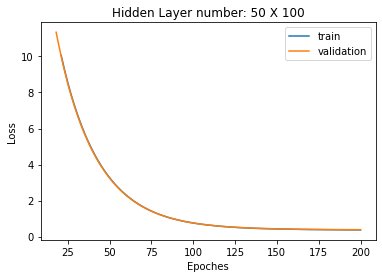

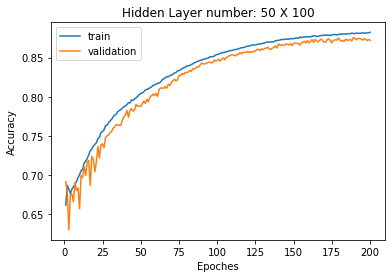

[784, 100, 50, 10]
Epoch 1, Time 1.6495881080627441 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.4625
Epoch 11, Time 17.723646879196167 seconds
Train_loss = nan, Valid_loss = 27.5724, Valid_accuracy = 0.5980
Epoch 21, Time 34.21170377731323 seconds
Train_loss = 18.5117, Valid_loss = 18.2152, Valid_accuracy = 0.6738
Epoch 31, Time 50.53669476509094 seconds
Train_loss = 12.3183, Valid_loss = 12.1095, Valid_accuracy = 0.7328
Epoch 41, Time 66.92369604110718 seconds
Train_loss = 8.2523, Valid_loss = 8.1151, Valid_accuracy = 0.7608
Epoch 51, Time 83.11308073997498 seconds
Train_loss = 5.5769, Valid_loss = 5.4887, Valid_accuracy = 0.7860
Epoch 61, Time 99.36574530601501 seconds
Train_loss = 3.8116, Valid_loss = 3.7629, Valid_accuracy = 0.8003
Epoch 71, Time 115.58552408218384 seconds
Train_loss = 2.6448, Valid_loss = 2.6153, Valid_accuracy = 0.8188
Epoch 81, Time 131.94295120239258 seconds
Train_loss = 1.8738, Valid_loss = 1.8571, Valid_accuracy = 0.8323
Epoch 91, Time 148.

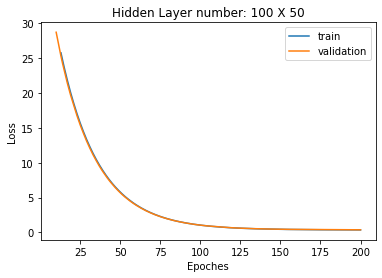

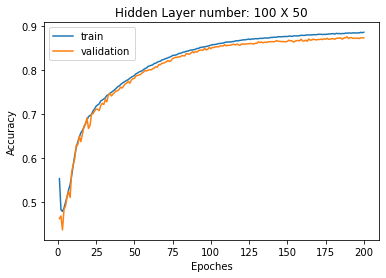

[784, 25, 50, 10]
Epoch 1, Time 0.8267877101898193 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.5500
Epoch 11, Time 8.736709833145142 seconds
Train_loss = nan, Valid_loss = 7.8060, Valid_accuracy = 0.6115
Epoch 21, Time 17.75432562828064 seconds
Train_loss = 5.2892, Valid_loss = 5.2522, Valid_accuracy = 0.6473
Epoch 31, Time 25.8473858833313 seconds
Train_loss = 3.6497, Valid_loss = 3.6296, Valid_accuracy = 0.7035
Epoch 41, Time 35.08567523956299 seconds
Train_loss = 2.5757, Valid_loss = 2.5702, Valid_accuracy = 0.7275
Epoch 51, Time 46.1560640335083 seconds
Train_loss = 1.8570, Valid_loss = 1.8579, Valid_accuracy = 0.7583
Epoch 61, Time 58.746389627456665 seconds
Train_loss = 1.3854, Valid_loss = 1.3900, Valid_accuracy = 0.7810
Epoch 71, Time 70.62642049789429 seconds
Train_loss = 1.0644, Valid_loss = 1.0686, Valid_accuracy = 0.7992
Epoch 81, Time 84.14777445793152 seconds
Train_loss = 0.8455, Valid_loss = 0.8493, Valid_accuracy = 0.8203
Epoch 91, Time 96.63243913650

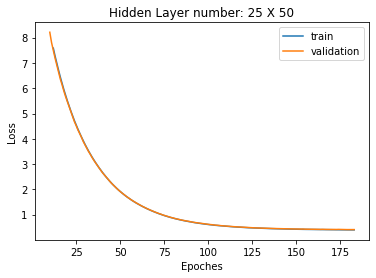

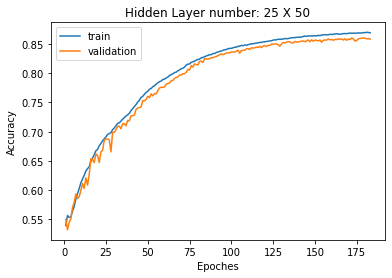

[784, 50, 25, 10]
Epoch 1, Time 1.4231932163238525 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.2978
Epoch 11, Time 15.857585668563843 seconds
Train_loss = 14.6764, Valid_loss = 14.4076, Valid_accuracy = 0.4257
Epoch 21, Time 30.087525129318237 seconds
Train_loss = 9.7487, Valid_loss = 9.5835, Valid_accuracy = 0.5423
Epoch 31, Time 44.1249794960022 seconds
Train_loss = 6.5681, Valid_loss = 6.4530, Valid_accuracy = 0.6275
Epoch 41, Time 58.584304332733154 seconds
Train_loss = 4.4838, Valid_loss = 4.4159, Valid_accuracy = 0.6735
Epoch 51, Time 74.11975145339966 seconds
Train_loss = 3.1171, Valid_loss = 3.0791, Valid_accuracy = 0.7283
Epoch 61, Time 88.62196254730225 seconds
Train_loss = 2.2176, Valid_loss = 2.1964, Valid_accuracy = 0.7550
Epoch 71, Time 102.81799268722534 seconds
Train_loss = 1.6166, Valid_loss = 1.6027, Valid_accuracy = 0.7813
Epoch 81, Time 113.77719116210938 seconds
Train_loss = 1.2069, Valid_loss = 1.1988, Valid_accuracy = 0.8055
Epoch 91, Time 124.

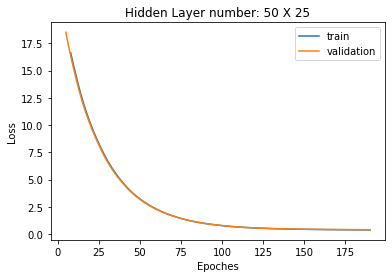

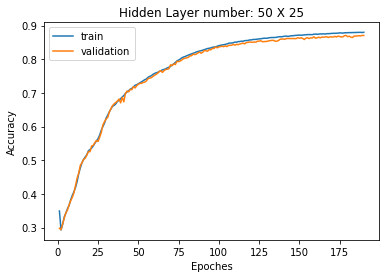

In [2]:
# Layer Specs: 50  100, 100  50, 25  50, and 50  25
Hidden_Layer = [[50, 100], [100, 50], [25, 50], [50, 25]]
config = yaml.load(open('./parte.yaml', 'r'), Loader=yaml.SafeLoader)

# # Load the data
# x_train, y_train = load_data(path="./", mode="train")
# x_test, y_test = load_data(path="./", mode="t10k")

# x_train = normalize_data(x_train)
# # Y_train = one_hot_encoding(labels=Y_train)
# x_test = normalize_data(x_test)
# # y_test = one_hot_encoding(labels=y_test)

# # Create splits for validation data here.
# x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)

for hidden in Hidden_Layer:
    config['layer_specs'][1:3] = hidden
    print(config['layer_specs'])
    model  = Neuralnetwork(config)


    # train the model
    recording = train(model, x_train, y_train, x_valid, y_valid, config)

    # Recall parameters with minimum validation loss
    model.load_para()

    test_accuracy = test(model, x_test, y_test)

    print('Test_accuracy: {}'.format(test_accuracy))

    # Plots
    plt.figure
    plt.plot(recording['epoches'], recording['train_loss'], label='train')
    plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Hidden Layer number: {} X {}'.format(hidden[0],hidden[1]))
    plt.show()

    plt.figure
    plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
    plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
    plt.xlabel('Epoches')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Hidden Layer number: {} X {}'.format(hidden[0],hidden[1]))
    plt.show()




### (ii) Three hidden layers

Epoch 1, Time 1.1479270458221436 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.2592
Epoch 11, Time 10.844991207122803 seconds
Train_loss = 10.4520, Valid_loss = 10.3053, Valid_accuracy = 0.5098
Epoch 21, Time 21.884032011032104 seconds
Train_loss = 7.1174, Valid_loss = 7.0230, Valid_accuracy = 0.5812
Epoch 31, Time 33.12496614456177 seconds
Train_loss = 4.9051, Valid_loss = 4.8286, Valid_accuracy = 0.6450
Epoch 41, Time 43.27880835533142 seconds
Train_loss = 3.4138, Valid_loss = 3.3662, Valid_accuracy = 0.6693
Epoch 51, Time 53.756781339645386 seconds
Train_loss = 2.4304, Valid_loss = 2.3974, Valid_accuracy = 0.7045
Epoch 61, Time 64.3304991722107 seconds
Train_loss = 1.7814, Valid_loss = 1.7591, Valid_accuracy = 0.7442
Epoch 71, Time 74.14026093482971 seconds
Train_loss = 1.3539, Valid_loss = 1.3411, Valid_accuracy = 0.7678
Epoch 81, Time 84.26617789268494 seconds
Train_loss = 1.0693, Valid_loss = 1.0612, Valid_accuracy = 0.7820
Epoch 91, Time 94.19362473487854 second

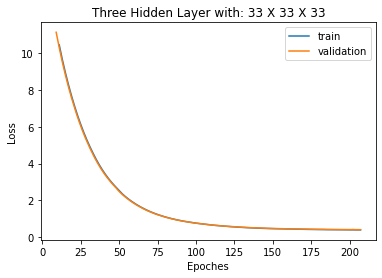

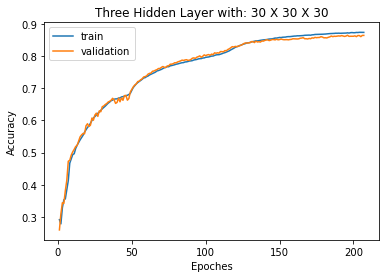

In [3]:

config['layer_specs'] = [784, 33, 33, 33, 10]
model  = Neuralnetwork(config)

# # Load the data
# x_train, y_train = load_data(path="./", mode="train")
# x_test, y_test = load_data(path="./", mode="t10k")

# x_train = normalize_data(x_train)
# # Y_train = one_hot_encoding(labels=Y_train)
# x_test = normalize_data(x_test)
# # y_test = one_hot_encoding(labels=y_test)

# # Create splits for validation data here.
# x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)

# train the model
recording = train(model, x_train, y_train, x_valid, y_valid, config)

# Recall parameters with minimum validation loss
model.load_para()

test_accuracy = test(model, x_test, y_test)

print('Test_accuracy: {}'.format(test_accuracy))

# Plots
plt.figure
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('Three Hidden Layer with: {} X {} X {}'.format(config['layer_specs'][1], config['layer_specs'][2], config['layer_specs'][3]))
plt.show()

plt.figure
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Three Hidden Layer with: 30 X 30 X 30')
plt.show()

### (iii) One hidden layer

Epoch 1, Time 1.5523359775543213 seconds
Train_loss = nan, Valid_loss = nan, Valid_accuracy = 0.6735
Epoch 11, Time 16.98431158065796 seconds
Train_loss = 27.4237, Valid_loss = 26.8848, Valid_accuracy = 0.7682
Epoch 21, Time 31.955111503601074 seconds
Train_loss = 17.5167, Valid_loss = 17.2347, Valid_accuracy = 0.7700
Epoch 31, Time 48.597533226013184 seconds
Train_loss = 11.5241, Valid_loss = 11.3326, Valid_accuracy = 0.7953
Epoch 41, Time 63.533878564834595 seconds
Train_loss = 7.6820, Valid_loss = 7.5715, Valid_accuracy = 0.8050
Epoch 51, Time 78.71151518821716 seconds
Train_loss = 5.1813, Valid_loss = 5.1196, Valid_accuracy = 0.8115
Epoch 61, Time 93.88515186309814 seconds
Train_loss = 3.5407, Valid_loss = 3.5067, Valid_accuracy = 0.8195
Epoch 71, Time 108.88307356834412 seconds
Train_loss = 2.4615, Valid_loss = 2.4450, Valid_accuracy = 0.8323
Epoch 81, Time 124.11753058433533 seconds
Train_loss = 1.7500, Valid_loss = 1.7447, Valid_accuracy = 0.8385
Epoch 91, Time 139.2049243450164

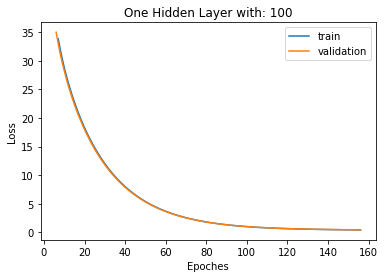

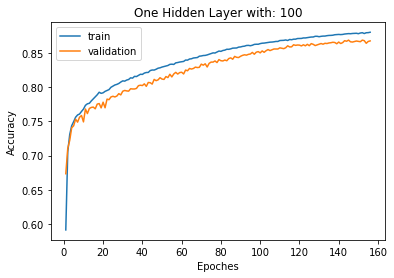

In [4]:
config['layer_specs'] = [784, 100, 10]
model  = Neuralnetwork(config)

# # Load the data
# x_train, y_train = load_data(path="./", mode="train")
# x_test, y_test = load_data(path="./", mode="t10k")

# x_train = normalize_data(x_train)
# # Y_train = one_hot_encoding(labels=Y_train)
# x_test = normalize_data(x_test)
# # y_test = one_hot_encoding(labels=y_test)

# # Create splits for validation data here.
# x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)

# train the model
recording = train(model, x_train, y_train, x_valid, y_valid, config)

# Recall parameters with minimum validation loss
model.load_para()

test_accuracy = test(model, x_test, y_test)

print('Test_accuracy: {}'.format(test_accuracy))

# Plots
plt.figure
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('One Hidden Layer with: 100')
plt.show()

plt.figure
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('One Hidden Layer with: 100')
plt.show()

## (d) Experiment with Regularization

In [4]:
# load model para
config_d = yaml.load(open('./partd.yaml', 'r'), Loader=yaml.SafeLoader)

recordings = []

for l2_penalty in [1e-2, 1e-3, 1e-4]:
    config_d['L2_penalty'] = l2_penalty

    # Train the model with cross validation
    max_test_accu = 0

    model_d = Neuralnetwork(config_d)
    recording = train(model_d, x_train, y_train, x_valid, y_valid, config_d)
    recordings.append(recording)

    # Recall parameters with minimum validation loss
    model_d.load_para()
    test_accuracy = test(model_d, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'l2_penalty: {l2_penalty}, max test accuracy: {max_test_accu:.4f}')

Epoch 1, Time 1.472996473312378 seconds
Train_loss = 182.4281, Valid_loss = 144.7741, Valid_accuracy = 0.2455
Epoch 11, Time 16.237996339797974 seconds
Train_loss = 3.5014, Valid_loss = 3.0142, Valid_accuracy = 0.7490
Epoch 21, Time 30.566997289657593 seconds
Train_loss = 1.0102, Valid_loss = 1.0090, Valid_accuracy = 0.7563
Epoch 31, Time 44.95043063163757 seconds
Train_loss = 0.9578, Valid_loss = 0.9651, Valid_accuracy = 0.7563
l2_penalty: 0.01, max test accuracy: 0.7534
Epoch 1, Time 1.461003065109253 seconds
Train_loss = 29.0513, Valid_loss = 25.9161, Valid_accuracy = 0.2263
Epoch 11, Time 16.049002170562744 seconds
Train_loss = 14.8887, Valid_loss = 14.6795, Valid_accuracy = 0.5973
Epoch 21, Time 30.773000240325928 seconds
Train_loss = 9.8054, Valid_loss = 9.6914, Valid_accuracy = 0.6652
Epoch 31, Time 45.64051532745361 seconds
Train_loss = 6.6006, Valid_loss = 6.5305, Valid_accuracy = 0.7133
Epoch 41, Time 61.07199192047119 seconds
Train_loss = 4.5198, Valid_loss = 4.4765, Valid_a

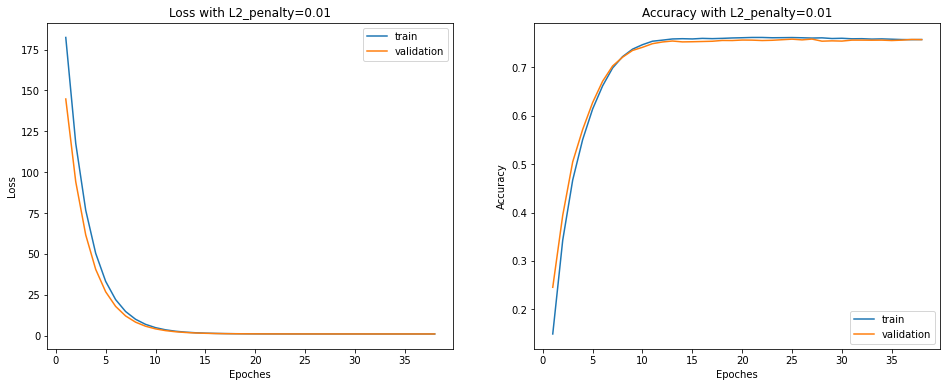

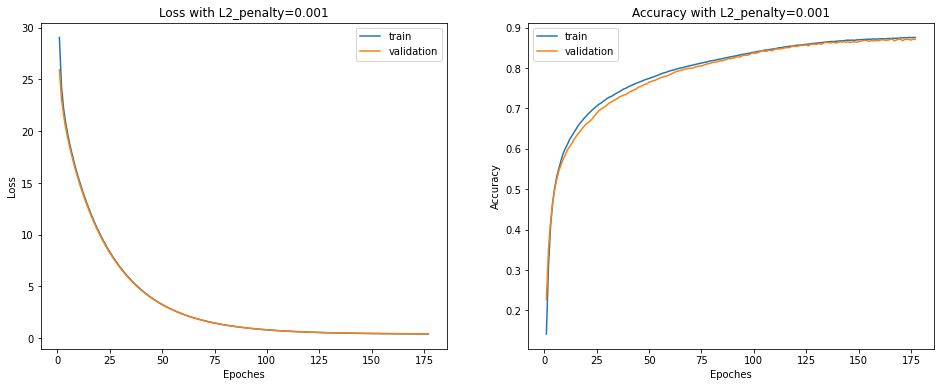

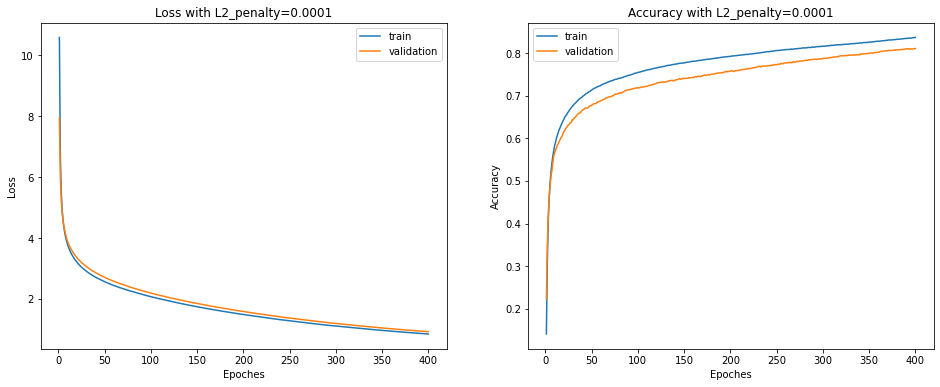

In [12]:
for i, l2_penalty in enumerate([1e-2, 1e-3, 1e-4]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(recordings[i]['epoches'], recordings[i]['train_loss'], label='train')
    ax1.plot(recordings[i]['epoches'], recordings[i]['valid_loss'], label='validation')
    ax1.set_xlabel('Epoches')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss with L2_penalty={l2_penalty}')
    ax1.legend()

    ax2.plot(recordings[i]['epoches'], recordings[i]['train_accuracy'], label='train')
    ax2.plot(recordings[i]['epoches'], recordings[i]['valid_accuracy'], label='validation')
    ax2.set_xlabel('Epoches')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy with L2_penalty={l2_penalty}')
    ax2.legend()
    fig.show()

## (e) Experiment with Activations.

In [5]:
# load model para
config_e = yaml.load(open('./parte.yaml', 'r'), Loader=yaml.SafeLoader)

recordings_e = []

for activation in ['sigmoid', 'tanh', 'ReLU', 'leakyReLU']:
    config_e['activation'] = activation

    # Train the model with cross validation
    max_test_accu = 0

    model_e = Neuralnetwork(config_e)
    recording = train(model_e, x_train, y_train, x_valid, y_valid, config_e)
    recordings_e.append(recording)

    # Recall parameters with minimum validation loss
    model_e.load_para()
    test_accuracy = test(model_e, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'activation: {activation}, max test accuracy: {max_test_accu:.4f}')

Epoch 1, Time 1.1998507976531982 seconds
Train_loss = 25.0428, Valid_loss = 23.5221, Valid_accuracy = 0.1482
Epoch 11, Time 13.144675016403198 seconds
Train_loss = 14.8863, Valid_loss = 14.6071, Valid_accuracy = 0.5487
Epoch 21, Time 25.180765867233276 seconds
Train_loss = 9.9795, Valid_loss = 9.8066, Valid_accuracy = 0.6428
Epoch 31, Time 36.82030916213989 seconds
Train_loss = 6.8186, Valid_loss = 6.7090, Valid_accuracy = 0.6938
Epoch 41, Time 48.43708252906799 seconds
Train_loss = 4.7582, Valid_loss = 4.6884, Valid_accuracy = 0.7188
Epoch 51, Time 59.98908519744873 seconds
Train_loss = 3.4065, Valid_loss = 3.3630, Valid_accuracy = 0.7358
Epoch 61, Time 71.48808288574219 seconds
Train_loss = 2.5182, Valid_loss = 2.4926, Valid_accuracy = 0.7470
Epoch 71, Time 82.82108354568481 seconds
Train_loss = 1.9333, Valid_loss = 1.9190, Valid_accuracy = 0.7552
Epoch 81, Time 94.17708349227905 seconds
Train_loss = 1.5450, Valid_loss = 1.5385, Valid_accuracy = 0.7642
Epoch 91, Time 105.509082794189

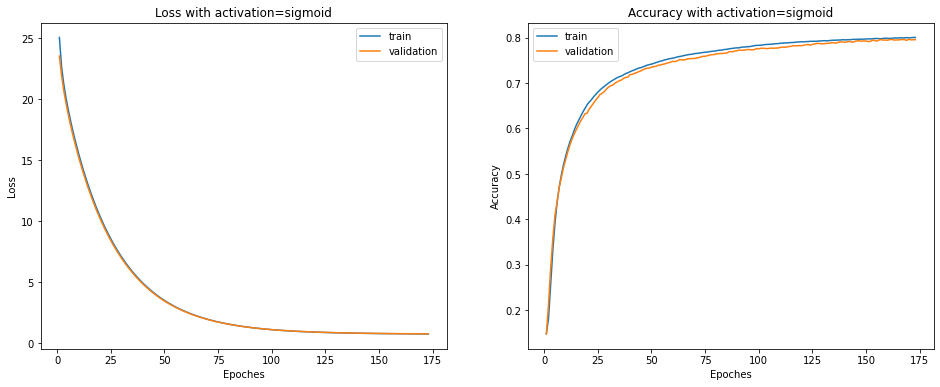

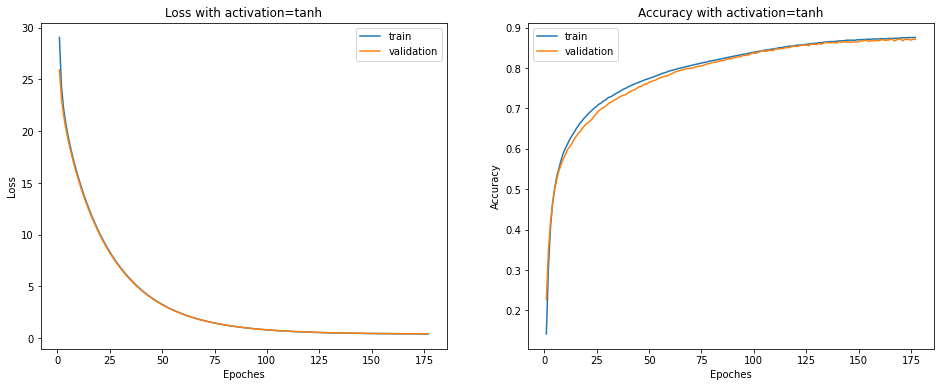

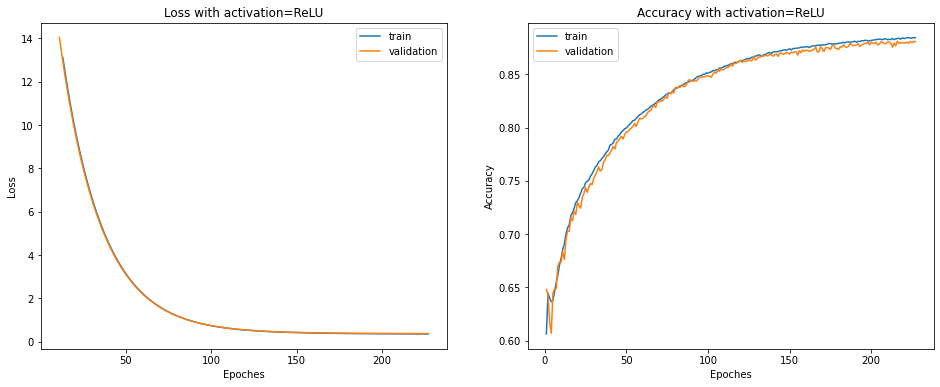

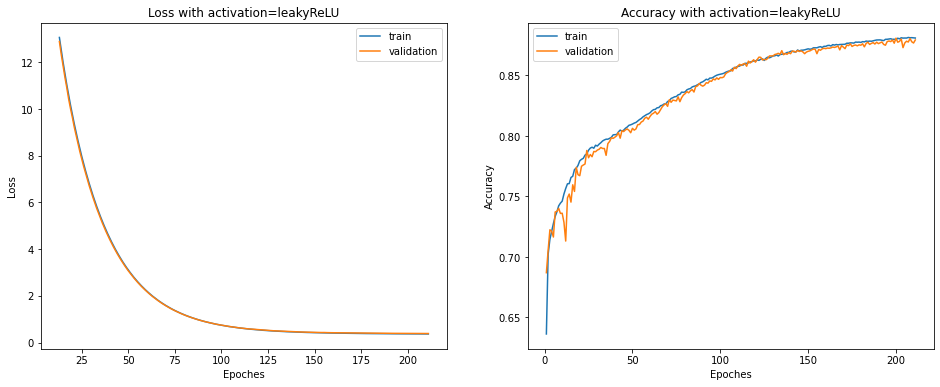

In [13]:
for i, activation in enumerate(['sigmoid', 'tanh', 'ReLU', 'leakyReLU']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(recordings_e[i]['epoches'], recordings_e[i]['train_loss'], label='train')
    ax1.plot(recordings_e[i]['epoches'], recordings_e[i]['valid_loss'], label='validation')
    ax1.set_xlabel('Epoches')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss with activation={activation}')
    ax1.legend()

    ax2.plot(recordings_e[i]['epoches'], recordings_e[i]['train_accuracy'], label='train')
    ax2.plot(recordings_e[i]['epoches'], recordings_e[i]['valid_accuracy'], label='validation')
    ax2.set_xlabel('Epoches')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy with activation={activation}')
    ax2.legend()
    fig.show()